In [147]:
%matplotlib inline

#4. Работа с текстами и интернетом 

#4.1 Форматирование строк

Есть способ, похожий на printf/scanf из C.

In [149]:
"%s %s, %s %03d" % ('James', 'Bond', 'agent', 7)

'James Bond, agent 007'

Второй способ -- с помощью команды format.

In [151]:
"{0} {1}".format('GTA', 5)

'GTA 5'

Также можно вместо номеров использовать именованные аргументы

In [153]:
"{game} {part}".format(game='GTA', part=5)

'GTA 5'

##4.1 Str, unicode и кодировки

Под кодировкой мы будет понимать пару алгоритмов 
1) преобразования символов в байты -- алгоритм кодирования
и
2) преобразования байтов в символы -- алгоритм декодирования

Кодировка, с которой мы с вами уже работали, это ASCII

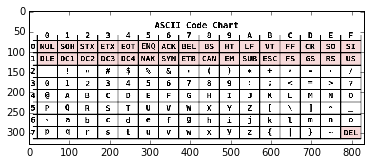

In [161]:
from skimage import io
img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/4/4f/ASCII_Code_Chart.svg/830px-ASCII_Code_Chart.svg.png')
io.imshow(img)

Еще одна кодировка, которая нам будет нужна -- это utf-8. В ней каждый символ занимает от 1 до 4-х байтов.
На символах ASCII байтовое представление совпадает с представлением utf-8.

Итак, во втором питоне str -- это не последовательность символов, а последовательность байт.
Разницу легко понять на следующем примере.

In [158]:
s = 'привет'
s

'\xd0\xbf\xd1\x80\xd0\xb8\xd0\xb2\xd0\xb5\xd1\x82'

Как видно, символов здесь 6, а байт 12

In [188]:
s = '\x41'
s

'A'

In [189]:
s = '\x0A'
s

'\n'

In [190]:
s = '\xFF'
s

'\xff'

In [193]:
'\xf0\x20\xd5\x62\x34'

'\xf0 \xd5b4'

unicode -- последовательность символов

In [17]:
u'Конь b1 a3'

u'\u041a\u043e\u043d\u044c b1 a3'

In [211]:
u'привет'

u'\u043f\u0440\u0438\u0432\u0435\u0442'

In [217]:
u'🐸'

u'\U0001f438'

Для перехода между str и unicode используются encode и decode

In [214]:
u = u'прожекторпэрисхилтон'
s = u.encode('utf-8')
s

'\xd0\xbf\xd1\x80\xd0\xbe\xd0\xb6\xd0\xb5\xd0\xba\xd1\x82\xd0\xbe\xd1\x80\xd0\xbf\xd1\x8d\xd1\x80\xd0\xb8\xd1\x81\xd1\x85\xd0\xb8\xd0\xbb\xd1\x82\xd0\xbe\xd0\xbd'

In [216]:
u_other = s.decode('utf-8')
u_other

u'\u043f\u0440\u043e\u0436\u0435\u043a\u0442\u043e\u0440\u043f\u044d\u0440\u0438\u0441\u0445\u0438\u043b\u0442\u043e\u043d'

Совет для работы с файлами в разных кодировках

In [ ]:
with open('input.txt') as f:
    bytes = f.read()
text = bytes.decode('utf-8')

...

bytes_out = text_out.encode('utf-8')
with open('output.txt', 'w') as g:
    g.write(bytes_out)

Чтобы редактор/интерпретатор понимал, в какой кодировке написан сам код
первой строкой можно добавить, например, такую

In [ ]:
# -*- coding: utf-8 -*-

#4.3 Работа с интернетом

Основными действиями для работы с интернетом для нас будут скачивание данных и анализ скачанных данных.

Для закачки страниц будем использовать urlopen

In [1]:
from urllib2 import urlopen

In [3]:
conn = urlopen('https://yandex.ru')
html = conn.read()
print html

<!DOCTYPE html><html class="i-ua_js_no i-ua_css_standart i-ua_browser_" lang="ru"><head xmlns:og="http://ogp.me/ns#"><meta http-equiv="X-UA-Compatible" content="IE=edge"><title>Яндекс</title><meta http-equiv=Content-Type content="text/html;charset=UTF-8"><link rel="apple-touch-icon" href="//yastatic.net/morda-logo/i/apple-touch-icon/ru-76x76.png" sizes="76x76"><link rel="apple-touch-icon" href="//yastatic.net/morda-logo/i/apple-touch-icon/ru-120x120.png" sizes="120x120"><link rel="apple-touch-icon" href="//yastatic.net/morda-logo/i/apple-touch-icon/ru-152x152.png" sizes="152x152"><link rel="apple-touch-icon" href="//yastatic.net/morda-logo/i/apple-touch-icon/ru-180x180.png" sizes="180x180"><link rel="alternate" type="application/rss+xml" title="Новости Яндекса" href="//company.yandex.ru/news/news.rss"><link rel="alternate" type="application/rss+xml" title="Блог Яндекса" href="//company.yandex.ru/blog/index.rss"><link rel="search" href="//yandex.ru/opensearch.xml" title="Яндекс" type="a

Для анализа страниц будем использовать HTMLParser, но об этом в следующий раз.

#4.3 Список друзей Вконтакте

Решим следующую задачу. Нам сообщают id пользователя vk, мы должны вывести список его друзей с именами и фамилиями.

Для решения задачи будем использовать метод friends.get из API vk. Он позволяет получить список id друзей данного пользователя.

In [8]:
def get_friends(user_id):
    url = 'https://api.vk.com/method/friends.get?user_id='+str(user_id)
    conn = urlopen(url)
    json = conn.read()
    left, right = json.index('['), json.index(']')
    json = json[left+1:right]
    return json.split(',')

In [9]:
get_friends(77393314)

['132777',
 '877126',
 '1253954',
 '2361256',
 '2444122',
 '2650571',
 '3760765',
 '3792892',
 '4381467',
 '6154817',
 '6262467',
 '7767376',
 '8148852',
 '8356804',
 '9347511',
 '10024389',
 '11278871',
 '11311268',
 '13230265',
 '15636824',
 '17336757',
 '20323165',
 '21916947',
 '26652898',
 '30600789',
 '33942184',
 '34547966',
 '37929038',
 '40387185',
 '48302734',
 '48675527',
 '49535587',
 '50559543',
 '53678906',
 '56361355',
 '57272392',
 '58671810',
 '62771727',
 '63487795',
 '64277024',
 '64415673',
 '66439801',
 '71088604',
 '71296522',
 '74442553',
 '75551095',
 '76018367',
 '77962993',
 '78372840',
 '78613044',
 '82890342',
 '83562177',
 '83568283',
 '83664996',
 '83770636',
 '83819817',
 '84111715',
 '85797875',
 '88730812',
 '90493463',
 '91471404',
 '93685802',
 '94269870',
 '95235394',
 '96016778',
 '96728987',
 '97027418',
 '98477408',
 '105234215',
 '108674602',
 '108756440',
 '110335478',
 '116715458',
 '117181134',
 '122467469',
 '125431175',
 '125876072',
 '13135

Более менее ясно, что html странички всех пользователей vk выглядят примерно одинаково. Посмотрим на одну из них:



In [10]:
conn = urlopen('https://vk.com/id'+str(77393314))
print conn.read()

<?xml version="1.0" encoding="utf-8"?>
<!DOCTYPE html PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.0//EN" "http://www.wapforum.org/DTD/xhtml-mobile10.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" >
<head>
<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=yes" />
<meta http-equiv="content-type" content="text/html; charset=utf-8" />
<meta name="format-detection" content="telephone=no" />
<meta http-equiv="X-UA-Compatible" content="IE=edge" />
<meta name="MobileOptimized" content="176" />
<meta name="HandheldFriendly" content="True" />
<base id="base">
<meta name="robots" content="noindex,nofollow" />
<title>Артём Шеремет</title>
<script type="text/javascript">
<!--
(function(k,a,d,e,f){function l(){var c=function(){var b=!1;try{b=new XMLHttpRequest}catch(a){try{b=new ActiveXObject("Msxml2.XMLHTTP")}catch(d){try{b=new ActiveXObject("Microsoft.XMLHTTP")}catch(c){b=!1}}}return b?e:f}(),g=function(){var b=k.createElement("

Видим, что имя пользователя заключено в <title>имя пользователя</title>

In [12]:
def nameOfUser(user_id):
    conn = urlopen('https://vk.com/id'+str(user_id))
    html = conn.read()
    left, right = html.index('<title>'), html.index('</title>')
    return html[left+len('<title>'):right]

In [15]:
def getInfoOfFriends(user_id):
    info = []
    for friend in get_friends(user_id):
        info.append((int(friend), nameOfUser(int(friend))))
    return info

In [20]:
for user_id, user_name in getInfoOfFriends(77393314):
    print user_name

Ирина Засыпкина
Николай Маслов
Алена Ежлова
Кирилл Скопцов
Валерия Черникова
Лена Иванова
Ваня Решетников
Михаил Замятнин
Дмитрий Коробицын
Денис Коротов
Георгий Жуков
Михаил Ляпин
Дмитрий Шелаев
Арсений Столяров
Михаил Кузин
Гоша Остроумов
Егор Котов
Екатерина Коротова
Михаил Носков
Игорь Романчев
Александр Николенко
Николай Трушников
Даша Алиева
Алёнка Туркова
Александр Дор
Мария Захарова
Лиза Яковенко
Ильдар Гараев
Лейла Бурушева
Женя Жуков
Артём Барышников
Женька Murchelago
Даня Баранов
Павел Писцов
Мария Морозова
Ярик Иванашев
Екатерина Мартынова
Никита Федорец
Димка Волохович
Виктория Фокина
Артемий Вишняков
Андрей Буюков
Ярослава Суспицина
Варя Перчик
Степан Судиловский
Roman Krivoshein
Дмитрий Лукошкин
Даниил Делан
Максим Пятков
Иван Новик
Леша Заводов
Всеволод Пухов
Костя Матвеев
Артём Воронов
Миша Кулёв
Маша Леонтьева
Егор Латухин
Анастасия Чашкова
Денис Емельянов
Виктория Алиакберова(силкина)
Алексей Биршерт
Владимир Голод
Елизавета Шестакова
Таня Дорожкина
Света Кулакова
Ле